<div class="alert alert-info">
    <h3>Language Curation</h3>
    <p>* This script is used for cleaning organic raw dataset. So far tested only on English dataset. </p>
    <p>* The initial cells are for loading the dependencies. The last two cells are for loading the input dataset either as pandas dataframe or as json.</p>
    <p>* For input json, the cleansed comment data is present in 'processed_comment_text' tag in the output json.</p>
    <p>* Packages required : pandas, numpy, os, regex, ntlk, langdetect</p>
    <p>* Refer to 'filter_comments_pandas' function block and image below for brief summary of the algorithm.</p>
    <p>* For any queries or feedback, mail to 'shyam.arumugaswamy@tum.de'</p>
    <br>
    <h5>Features:</h5>
    <p>* Included (Contractions, Replacements and Spell correction) compiled by Ahmed</p>
    <p>* Multi occuring punctuations (eg. ,,,, replace with ,) are replaced with single</p>
    <p>* Devanagari(Hindi) scripts are removed</p>
    <p>* In the comments with both Latin(English) and Devanagari(Hindi) scripts, Hindi ones in the comment are removed leaving behind the English ones intact</p>
    <p>* Hindi comments in Latin script(i.e Hinglish) are removed (though a minority of them will still remain - eg. 17 cases [.06%] as shown below)</p>
</div>

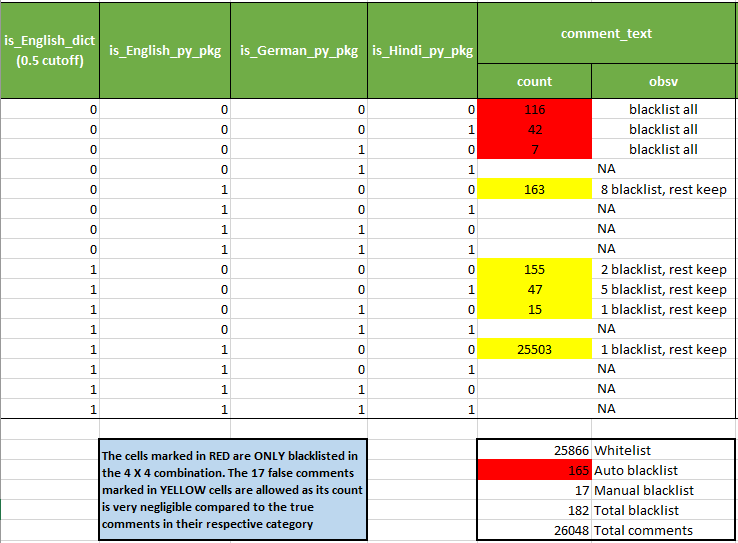

In [ ]:
#importing dictionary of English words

import nltk
nltk.download('words')
from nltk.corpus import words
dictwords = set(x.lower() for x in words.words())
#dictwords

In [ ]:
#importing contractions compiled by Ahmed

contractions = {
 "aren't": 'are not',
 "can't": 'cannot',
 "could've": 'could have',
 "couldn't": 'could not',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 'gonna': 'going to',
 'gotta': 'got to',
 "hadn't": 'had not',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he would',
 "he'll": 'he will',
 "he's": 'he is',
 "how's": 'how is',
 "I'd": 'I would',
 "I'll": 'I will',
 "I'm": 'I am',
 "i'm": 'I am',
 "I've": 'I have',
 "isn't": 'is not',
 "it'd": 'it would',
 "it'll": 'it will',
 "it's": 'it is',
 "mayn't": 'may not',
 "may've": 'may have',
 "mightn't": 'might not',
 "might've": 'might have',
 "mustn't": 'must not',
 "must've": 'must have',
 "needn't": 'need not',
 "o'clock": 'of the clock',
 "oughtn't": 'ought not',
 "she'd": 'she would',
 "she'll": 'she will',
 "she's": 'she is',
 "should've": 'should have',
 "shouldn't": 'should not',
 "that's": 'that is',
 "there're": 'there are',
 "there's": 'there is',
 "these're": 'these are',
 "they'd": 'they would',
 "they'll": 'they will',
 "they're": 'they are',
 "they've": 'they have',
 "this's": 'this is',
 "those're": 'those are',
 "wasn't": 'was not',
 "we'd": 'we would',
 "we'll": 'we will',
 "we're": 'we are',
 "we've": 'we have',
 "weren't": 'were not',
 "what'll": 'what will',
 "what're": 'what are',
 "what's": 'what is',
 "what've": 'what have',
 "when's": 'when is',
 "where're": 'where are',
 "where's": 'where is',
 "which's": 'which is',
 "who'd": 'who would',
 "who'll": 'who will',
 "who're": 'who are',
 "who's": 'who is',
 "why's": 'why is',
 "won't": 'will not',
 "would've": 'would have',
 "wouldn't": 'would not',
 "you'd": 'you would',
 "you'll": 'you will',
 "you're": 'you are',
 "you've": 'you have'}

In [ ]:
#replacement dictionary compiled by Ahmed

replacement_dict = {
    '\n' : ' ',
    '!=' : ' not equal ',
    '=' : ' equal ',
    b'\xc2\xae'.decode() : ' registered_sign ', # ®
    '\x92' : ' ',
    '\x91' : ' ',
    '\x96' : ' ',
    b'\xe2\x84\xa2'.decode() : ' trademark_sign ', # ™
    b'\xe2\x80\x90'.decode() : '-',
    '}': ')',
    '{': '(',
    b'\xc2\xb2'.decode() : ' squared ',
    b'\xc2\xa7'.decode() : ' section ',  # §
    b'\xc2\xb0'.decode() : ' degrees ',
    b'\xe2\x80\xa6'.decode() : ' . ',   # …
    '\$' : ' dollar ',
    b'\xe2\x82\xac'.decode() : ' euro ',
    '\|' : ' , ',    
    b'\xc2\xab'.decode() : ' \" ',
    b'\xc2\xbb'.decode() : ' \" ',
    '\+' : ' plus ',
    b'\xc2\xa2'.decode() : ' , ', # ¢
    b'\xe2\x80\x8b'.decode() : ' ',
    '\|' : ',',
    b'\xe2\x80\x93'.decode() : '-', # the long dash  –
    b'\xe2\x80\x94'.decode() : '-', # another long dash
    '\[' : '(',
    '\]' : ')', 
    '&' : ' and ',
    b'\xe2\x80\x9c'.decode() : '\"',
    b'\xe2\x80\x9d'.decode() : '\"',
    b'\xc2\xbd'.decode() : ' half ',
    b'\xc2\xbc'.decode() : ' quarter ',
    b'\xe2\x80\x99'.decode() : '\'',
    b'\xe2\x80\x98'.decode() : '\'',
    b'\xc2\xb4'.decode() : '\'',
    b'\xc2\xb5g'.decode() : ' microgram ',
    '.' : ' . ',
    ',' : ' , '
}

In [ ]:
#social_terms_organic_relevant_terms dictionary compiled by Ahmed

social_terms_organic_relevant_terms = {
    'btw' : ' by the way ',
    'tl;dr': ' summary ',
    'tbsp': ' table spoon ',
    'imho': ' in my opinion ',
    'imo' : ' in my opinion ',
    'oganic': ' organic ',
    'orgainc' : ' organic ',
    'tsp': ' tea spoon ',
    'faqs': ' frequently asked questions ',
    'fyi': ' for your information ',
    'pestdicides': ' pesticides ',
    'pestdicide': ' pesticide ',
    'pesiticides': ' pesticides ',
    'ogranic': ' organic ',
    'pestecides': ' pesticides ',
    'nonorganic': ' non organic ',
    'pestcides':' pesticides ',
    '<3': ' love ',
    ' alot ': ' a lot ',
    'thier': ' their ',
    'breastmilk': ' breast milk ',
    'agribusinesses' : ' agricultural businesses ',
    '<a href equal \"': ' ',
    'café': 'cafe'
}

In [ ]:
# Identifying English words from data corpus

def IsEnglish_dict(y):
    counter = 0
    for z in y:
        if(z in dictwords):
            counter +=1 
    return counter

In [ ]:
# Identifying language using pylibrary

from langdetect import detect_langs

def EnglishOrGermanOrHindi(string):
    try:
        res = detect_langs(string)
        lang_id = set(' '.join(re.split(r':',str(item))[0] for item in res).split())
        if 'id' in lang_id:
            return 'id'           
        elif 'en' in lang_id:
            return 'en'
        elif 'de' in lang_id:
            return 'de'
        return None
    except:
        return None
            

In [ ]:
# Cleaning and filtering comments when processing pandas df

import pandas as pd
import regex as re

def filter_comments_pandas(maindf):
    
   
    #Reading non empty comments
    filterdf = pd.DataFrame(maindf[(maindf.comment_text!='')]['comment_text'])     
    
    #Adding new columns for filter computation
    filterdf['tidy_comment_text'] = filterdf['split_comment_text'] = filterdf['no_words'] = filterdf['no_English_count'] = filterdf['ratio'] = filterdf['is_English_dict'] = filterdf['language']  = filterdf['is_English_py_pkg'] = filterdf['is_German_py_pkg'] = filterdf['is_Hindi_py_pkg'] = ''
        
    #Replacing multiple punctuations with single
    filterdf.replace({ r'\A\s+|\s+\Z': '', '\n' : '. ', r'\.+': '.', r'\,+': ',', r'\-+': '-', r"\'+": "'", r'\!+': '!', r'\?+': '?', r'\^+': '^', r'\#+': '#'}, regex=True, inplace=True)
    
    #Replacing Devanagari(Hindi scripts) with white space
    filterdf['comment_text'] = [(re.sub('\  +', ' ', (' '.join([(' ' if bool(re.search(r'\p{Devanagari}',y)) else y.strip()) for y in x.split()]).strip() if bool(re.search(r'\p{Devanagari}+',x)) else x.strip()))) for x in filterdf['comment_text']]

    #Replacing contractions compiled by Ahmed
    filterdf['comment_text'] = [' '.join(contractions[p] if p in contractions else (contractions[p.lower()] if p.lower() in contractions else p) for p in y.split()) for y in filterdf['comment_text']]

    #social_terms_organic_relevant_terms dictionary compiled by Ahmed
    filterdf['comment_text'] = [' '.join(social_terms_organic_relevant_terms[p.lower()] if p.lower() in social_terms_organic_relevant_terms else p for p in y.split()) for y in filterdf['comment_text']]

    #Replacement dictionary compiled by Ahmed
    filterdf['comment_text'] = [re.sub('\  +', ' ', ' '.join(replacement_dict[p] if p in replacement_dict else p for p in y.split())) for y in filterdf['comment_text']]

    #White spacing url links
    filterdf['tidy_comment_text'] = [re.split(r'http|https|www',x)[0] for x in filterdf['comment_text']]
    
    #Filtering only words
    filterdf['tidy_comment_text'] = [re.sub(r"[^\P{P}']+", ' ', x).strip() for x in filterdf['tidy_comment_text']]
    
    filterdf['split_comment_text'] = [x.lower().split() for x in filterdf['tidy_comment_text']]
    
    filterdf['no_words'] = [len(x) for x in filterdf['split_comment_text']]
    
    #Checking English words from dictionary
    filterdf['no_English_count'] = [IsEnglish_dict(x) for x in filterdf['split_comment_text']]
    
    filterdf['ratio'] = filterdf['no_English_count'] / filterdf['no_words']
    
    #Count of English dictionary words with 50% cutoff threshold
    filterdf['is_English_dict'] =  [1 if x > 0.5 else 0 for x in filterdf['ratio']]
    
    #Identifyting language using langdetect python library
    filterdf['language'] =  [EnglishOrGermanOrHindi(x) for x in filterdf['comment_text']]
       
    filterdf['is_English_py_pkg'] = [1 if x=='en' else 0 for x in filterdf['language']]
    
    filterdf['is_German_py_pkg'] = [1 if x=='de' else 0 for x in filterdf['language']]
    
    filterdf['is_Hindi_py_pkg'] = [1 if x=='id' else 0 for x in filterdf['language']]
    
    #Again replacing multiple punctuations with single
    filterdf.replace({r'\.+': '.', r'\,+': ',', r'\-+': '-', r"\'+": "'", r'\!+': '!', r'\?+': '?', r'\^+': '^', r'\#+': '#', r'\  +': ' '}, regex=True, inplace=True)    
       
     #Reading final non empty comments (post pre-processing)
    filterdf1 = filterdf[(filterdf.comment_text!='')]
    
    #Removing only the auto blacklisted comments
    #Then exporting just the 'comments_text' column after removing duplicates
    final_filterdf = filterdf1[~(filterdf1['is_English_dict'].isin(['0']) & filterdf1['is_English_py_pkg'].isin(['0']))][['comment_text']].drop_duplicates()
       
    return final_filterdf

In [ ]:
# Cleaning and filtering comments when processing a json object

import pandas as pd
import regex as re
import numpy as np

def filter_comments_json(maindf):
    
    filterdf = pd.DataFrame([{'comment_text':maindf}])
    
    #Adding new columns for filter computation
    filterdf['tidy_comment_text'] = filterdf['split_comment_text'] = filterdf['no_words'] = filterdf['no_English_count'] = filterdf['ratio'] = filterdf['is_English_dict'] = filterdf['language']  = filterdf['is_English_py_pkg'] = filterdf['is_German_py_pkg'] = filterdf['is_Hindi_py_pkg'] = ''
        
    #Replacing multiple punctuations with single
    filterdf.replace({ r'\A\s+|\s+\Z': '', '\n' : '. ', r'\.+': '.', r'\,+': ',', r'\-+': '-', r"\'+": "'", r'\!+': '!', r'\?+': '?', r'\^+': '^', r'\#+': '#'}, regex=True, inplace=True)
    
    #Replacing Devanagari(Hindi scripts) with white space
    filterdf['comment_text'] = [(re.sub('\  +', ' ', (' '.join([(' ' if bool(re.search(r'\p{Devanagari}',y)) else y.strip()) for y in x.split()]).strip() if bool(re.search(r'\p{Devanagari}+',x)) else x.strip()))) for x in filterdf['comment_text']]

    #Replacing contractions compiled by Ahmed
    filterdf['comment_text'] = [' '.join(contractions[p] if p in contractions else (contractions[p.lower()] if p.lower() in contractions else p) for p in y.split()) for y in filterdf['comment_text']]

    #social_terms_organic_relevant_terms dictionary compiled by Ahmed
    filterdf['comment_text'] = [' '.join(social_terms_organic_relevant_terms[p.lower()] if p.lower() in social_terms_organic_relevant_terms else p for p in y.split()) for y in filterdf['comment_text']]

    #Replacement dictionary compiled by Ahmed
    filterdf['comment_text'] = [re.sub('\  +', ' ', ' '.join(replacement_dict[p] if p in replacement_dict else p for p in y.split())) for y in filterdf['comment_text']]

    #White spacing url links
    filterdf['tidy_comment_text'] = [re.split(r'http|https|www',x)[0] for x in filterdf['comment_text']]
    
    #Filtering only words
    filterdf['tidy_comment_text'] = [re.sub(r"[^\P{P}']+", ' ', x).strip() for x in filterdf['tidy_comment_text']]
    
    filterdf['split_comment_text'] = [x.lower().split() for x in filterdf['tidy_comment_text']]
    
    filterdf['no_words'] = [len(x) for x in filterdf['split_comment_text']]
    
    #Checking English words from dictionary
    filterdf['no_English_count'] = [IsEnglish_dict(x) for x in filterdf['split_comment_text']]
    
    filterdf['ratio'] = filterdf['no_English_count'] / filterdf['no_words']
    
    #Count of English dictionary words with 50% cutoff threshold
    filterdf['is_English_dict'] =  [1 if x > 0.5 else 0 for x in filterdf['ratio']]
    
    #Identifyting language using langdetect python library
    filterdf['language'] =  [EnglishOrGermanOrHindi(x) for x in filterdf['comment_text']]
       
    filterdf['is_English_py_pkg'] = [1 if x=='en' else 0 for x in filterdf['language']]
    
    filterdf['is_German_py_pkg'] = [1 if x=='de' else 0 for x in filterdf['language']]
    
    filterdf['is_Hindi_py_pkg'] = [1 if x=='id' else 0 for x in filterdf['language']]
    
    #Again replacing multiple punctuations with single
    filterdf.replace({r'\.+': '.', r'\,+': ',', r'\-+': '-', r"\'+": "'", r'\!+': '!', r'\?+': '?', r'\^+': '^', r'\#+': '#', r'\  +': ' '}, regex=True, inplace=True)    
    

    #Removing only the auto blacklisted comments
    #Then exporting just the 'comments_text' 
    final_filterdf = filterdf[~(filterdf['is_English_dict'].isin(['0']) & filterdf['is_English_py_pkg'].isin(['0']))][['comment_text']]

    output =  '' if final_filterdf.empty else final_filterdf['comment_text'].iloc[0]
    
    return output

In [ ]:
# Loading dataset as pandas df

# Load your comments file as pandas dataframe 'jsons_data'. ENSURE it has a COLUMN named 'comment_text'
jsons_data = ####

print('Inital count: ', jsons_data.shape)

#Filtering relevant comments
json_filtered = filter_comments_pandas(jsons_data)

#Mention the directory to save the output
directory = ####

#Exporting the filtered comment to text file
file_output_txt_filename = directory + "/output/filtered_comments.txt" 
json_filtered.to_csv(file_output_txt_filename, header=False, index=False, sep='\t', mode='w+')

print('Final count',json_filtered.shape)
print('completed')


In [ ]:
#Testing the final filterd dataframe
json_filtered

In [ ]:
# Loading dataset as json files

import os, json
import pandas as pd
import regex as re


# provide folder path of json files
path_to_json = #####
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

print('No. of files read: ', len(json_files))
print('Names of files read: ', json_files)


# we need both the json and an index number so use enumerate()
for index, js in enumerate(json_files):
    output_file = path_to_json + '/processed_' + js
    with open(os.path.join(path_to_json, js), encoding='utf-8') as json_file:
        json_text = json.load(json_file)
        print('filename: ', js)
        print('no. of rows in file: ', len(json_text))
        
        i = 1
        for data in json_text:           
            for commentdata in data['comments']:
       
                commentdata['processed_comment_text'] = filter_comments_json(commentdata['comment_text']) if commentdata['comment_text'] != '' else commentdata['comment_text']

#             print(i)                
            i = i + 1
    
        #Output will be saved as processed_filename.json in same folder
        with open(output_file, 'w') as json_out_file:
                json.dump(json_text, json_out_file)
                
print('completed')
